In [1]:
## Enable matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt

## Imports
import pandas as pd
pd.set_option('mode.chained_assignment',None)
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

import numpy as np
from sklearn import ensemble
from sklearn import metrics

In [2]:
gifts_df = pd.read_csv('gifts.csv')

In [3]:
x = gifts_df['Longitude'].values
y = gifts_df['Latitude'].values
w = gifts_df['Weight'].values

In [4]:
from cv2 import imread, cvtColor, COLOR_BGR2RGB


## ----------------------------------------------
def read_image(path):
    """
    Read an image and convert to RGB using openCV
    """
    img = imread(path)
    return cvtColor(img, COLOR_BGR2RGB)

In [5]:
earth = read_image('earth.jpg')

In [6]:
def transform(x,y):
    """
    transform the latitude/longitude coordinates to the coordinates of the image
    """
    
    new_x = (x + 180)*(earth.shape[1]/360.0)
    new_y = -(y - 90)*(earth.shape[0]/180.0)
    
    return new_x, new_y

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


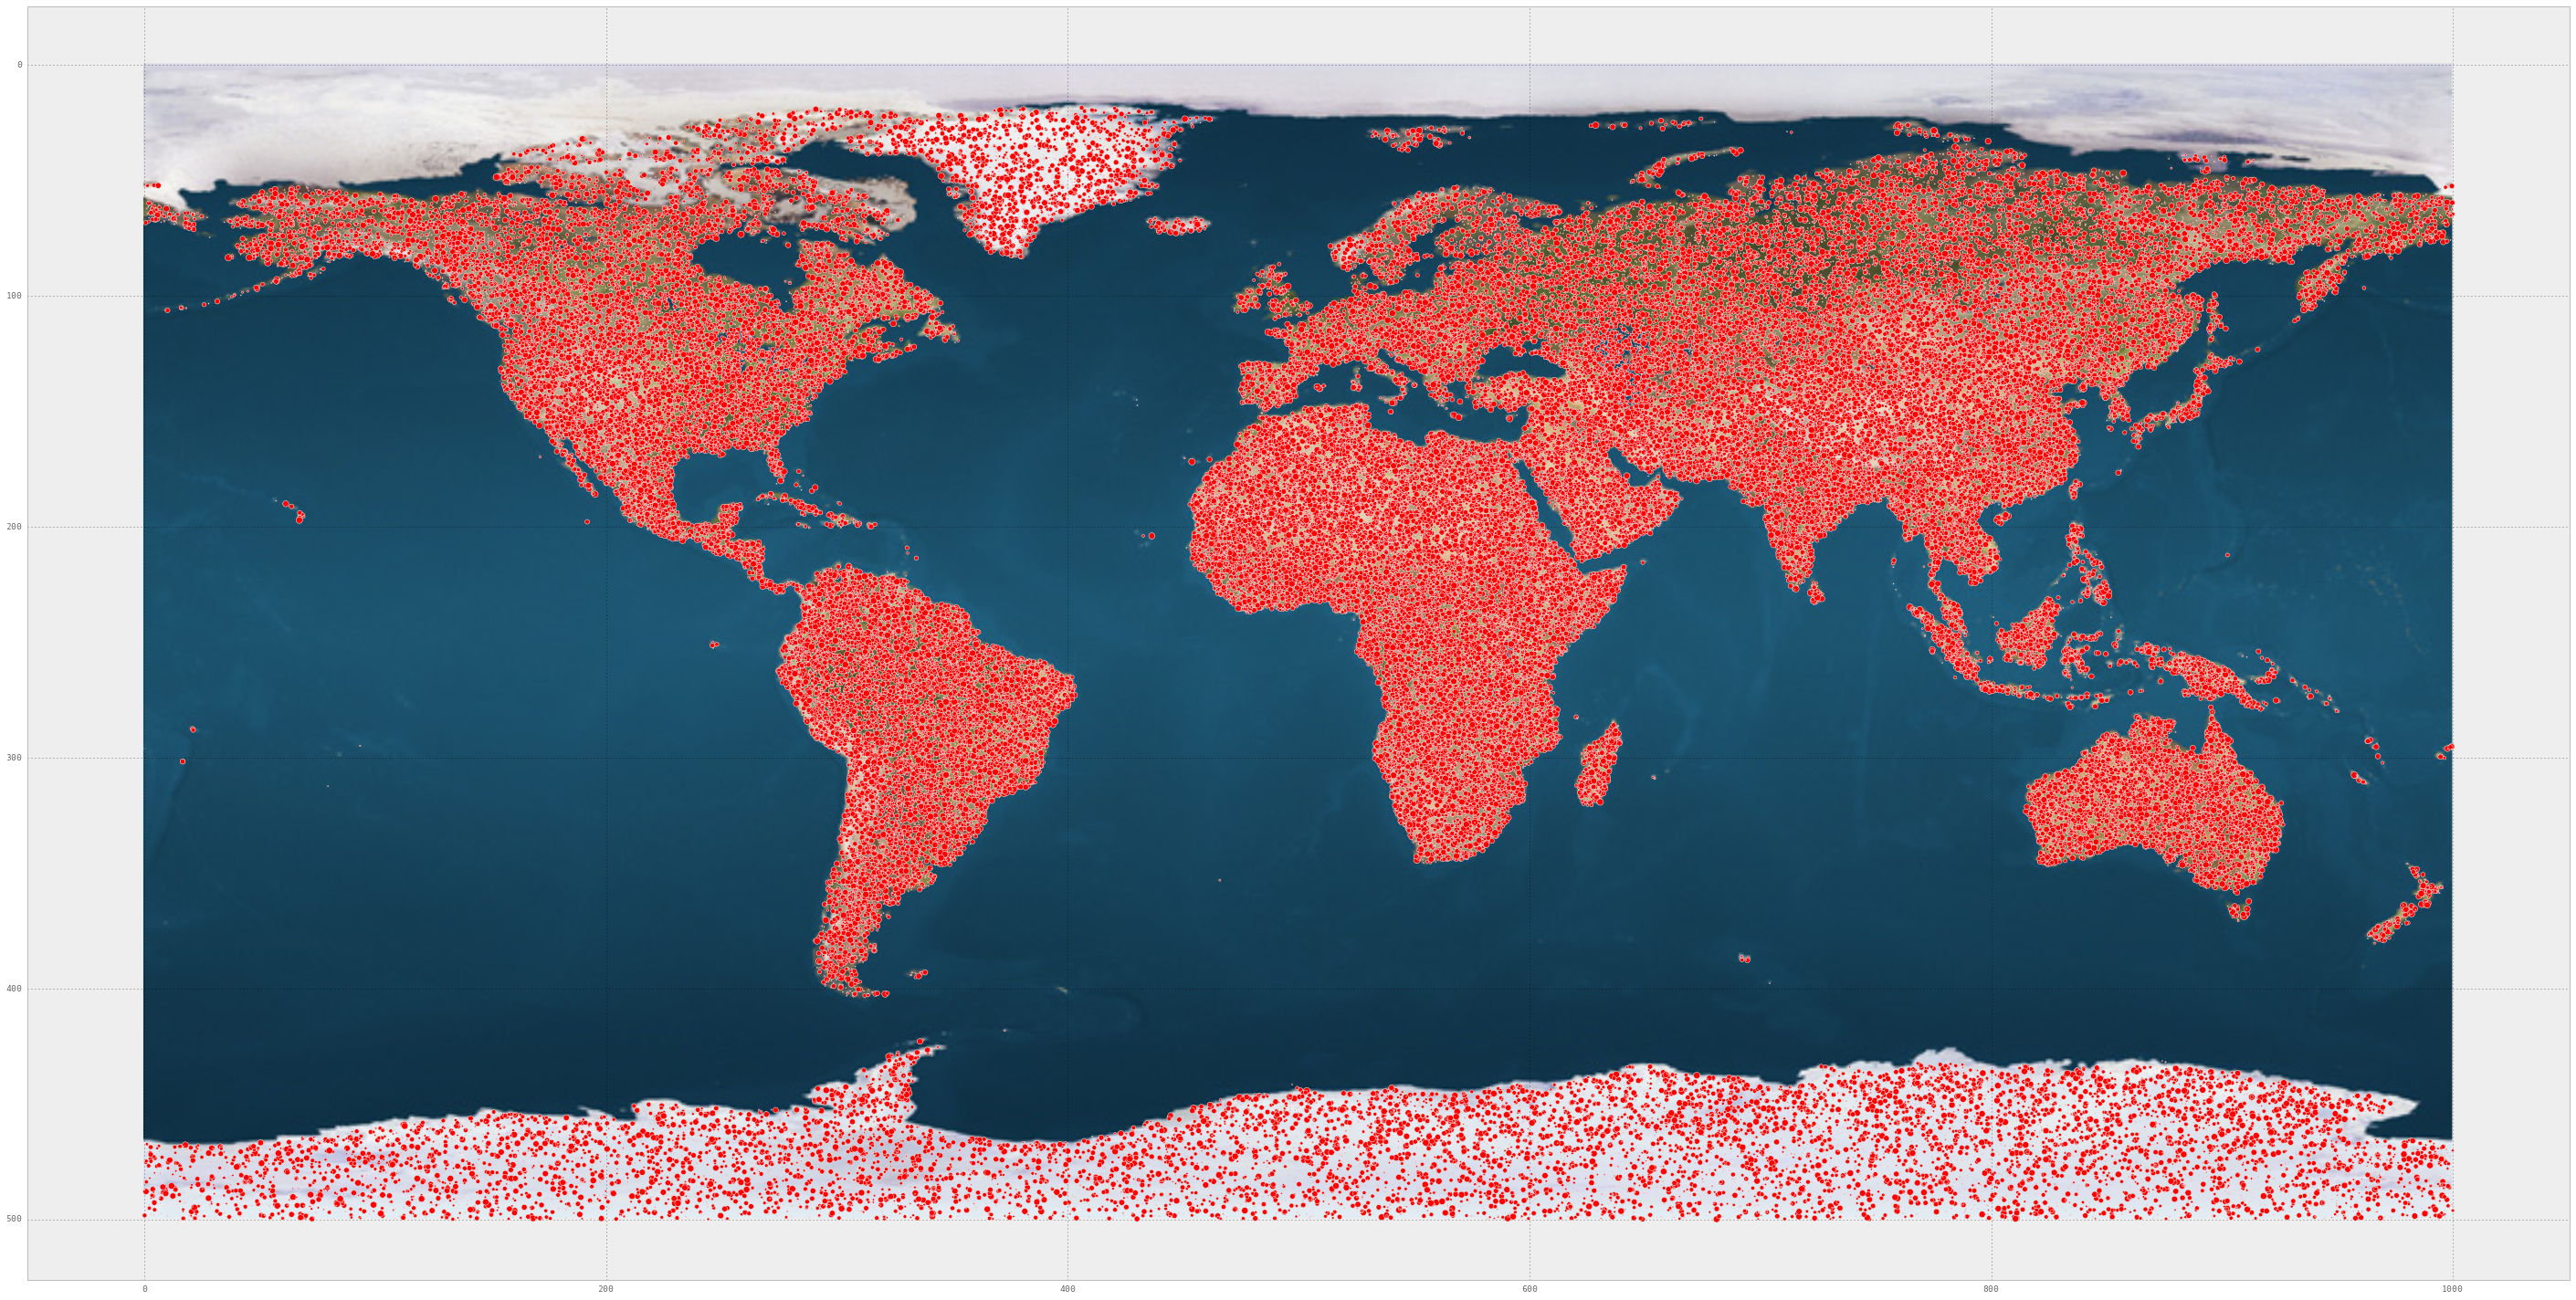

In [7]:
x_, y_ = transform(x,y)

plt.figure(figsize=(50,25))
plt.imshow(earth)
plt.scatter(x_, y_, s=w, c='red')

In [8]:
import math

## --------------------------------------------------
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [ ]:
NP = (0, 90)

gifts_df['current_Longitude'] = NP[0]
gifts_df['current_Latitude']  = NP[1]
gifts_df['done'] = False

In [ ]:
import time

answers = []
trip = 1
counter = 0
current_weight = 10.0

current_time = time.time()

while len(gifts_df):
    
    if counter%100 == 0:
        print counter,
        this_time = time.time()
        print this_time - current_time
        current_time = time.time()
    counter += 1
    
    ## Calculate distance to the current point
    gifts_df['distance'] = map(
        haversine,
        gifts_df['Longitude'],
        gifts_df['Latitude'],
        gifts_df['current_Longitude'],
        gifts_df['current_Latitude']
    )
    
    ## sort by order of increasing distance
    gifts_df = gifts_df.sort_values(by='distance')
    
    ## Retrieve data for the closest gift
    weight = gifts_df['Weight'].values[0]
    
    ## If the addition of the current best gift makes the weight go overboard, start new trip
    if current_weight + weight > 1000.0:
        trip += 1
        gifts_df['current_Longitude'] = NP[0]
        gifts_df['current_Latitude'] = NP[1]
        continue
        
    current_weight += weight
        
    gift_id   = gifts_df['GiftId'].values[0]
    gifts_df['Longitude'] = gifts_df['Longitude'].values[0]
    gifts_df['Latitude']  = gifts_df['Latitude'].values[0]
    gifts_df['done'].values[0] = True
    
    answers.append((trip, gift_id))
    
    ## Get rid of the gifts already treated
    gifts_df = gifts_df[1:]
    
    
    

0 0.000397920608521
100 20.9933819771
200 19.1551148891
300 19.1677241325
400 19.2785320282
500